# Detection Times

In [2]:
import sys
sys.path.append("../..")
import household_contact_tracing.BranchingProcessSimulation as hct
import pickle
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
# Importing the calibration dictionary
with open('../../Data/Calibration/hazard_rate_detection_prob_pairs.pickle', 'rb') as handle:
    pairs_dict = pickle.load(handle)
sns.set()

In [86]:
infection_reporting_prob = npr.choice([0.1])

hazard_rate_scale = pairs_dict[infection_reporting_prob]

contact_tracing_success_prob = npr.uniform(0.7, 0.95)

contact_trace_delay_par = npr.uniform(1.5, 2.5)

reduce_contacts_by = npr.uniform(0.0, 0.8)

do_2_step = npr.choice([True, False])

prob_has_trace_app = npr.uniform(0, 0.5)

In [87]:
simulation = hct.household_sim_contact_tracing(haz_rate_scale=hazard_rate_scale,
                                                 contact_tracing_success_prob=contact_tracing_success_prob,
                                                 contact_trace_delay_par=contact_trace_delay_par,
                                                 overdispersion=0.36,
                                                 infection_reporting_prob=infection_reporting_prob,
                                                 contact_trace=True,
                                                 reduce_contacts_by=reduce_contacts_by,
                                                 do_2_step=do_2_step,
                                                 test_before_propagate_tracing=False,
                                                 prob_has_trace_app=prob_has_trace_app,
                                                 starting_infections=1)

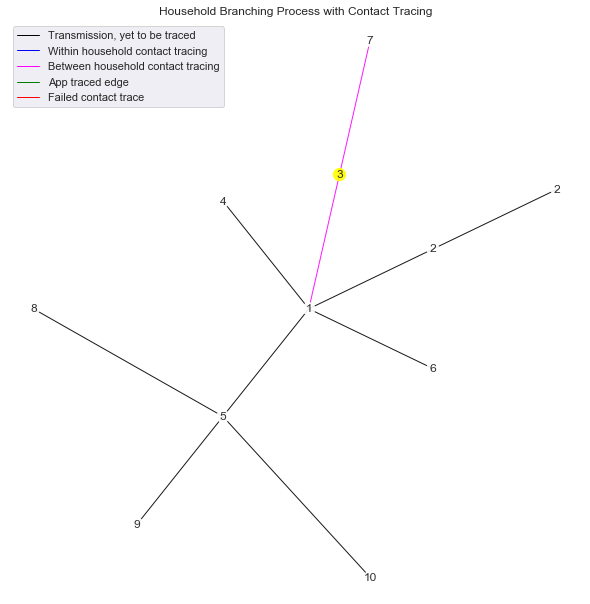

In [88]:
simulation.run_simulation_detection_times()
simulation.draw_network()

In [89]:
detection_times = []
count_when_detected = []
house_count = []
for _ in range(1000):
    
    simulation.run_simulation_detection_times()
    
    if simulation.end_reason == 'infection_detected':
        
        detection_times.append(simulation.time)
        count_when_detected.append(simulation.inf_counts[-1])
        house_count.append(simulation.house_count)

Text(0, 0.5, 'Frequency')

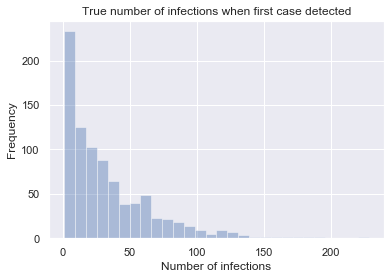

In [98]:
sns.distplot(count_when_detected, kde = False)
plt.title("True number of infections when first case detected")
plt.xlabel("Number of infections")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

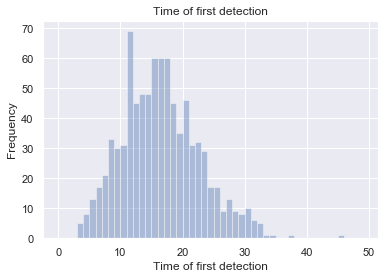

In [101]:
sns.distplot(detection_times, bins = range(50), kde = False)
plt.title("Time of first detection")
plt.xlabel("Time of first detection")
plt.ylabel("Frequency")

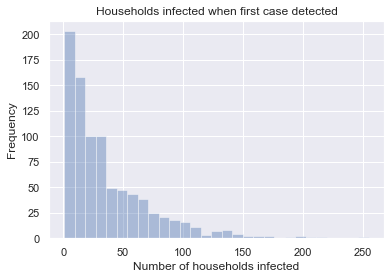

In [102]:
sns.distplot(house_count, kde = False)
plt.title("Households infected when first case detected")
plt.xlabel("Number of households infected")
plt.ylabel("Frequency")